In [1]:
#Enivornment Setup

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [3]:
#Data Read, Data Visualization,EDA Analysis,Data Pre-Processing,Data Splitting

In [4]:
#Data Read
file_path = '../input/car-price-prediction'
df=pd.read_csv(f'{file_path}/CarPrice_Assignment.csv')

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df = df.loc[:,~df.columns.duplicated()]

In [7]:
import pandas_profiling

In [8]:
# preparing profile report

profile_report = pandas_profiling.ProfileReport(df,minimal=True)
profile_report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.shape

(205, 26)

In [12]:
df.price.value_counts()

5572.0     2
6692.0     2
7957.0     2
7898.0     2
6229.0     2
          ..
6377.0     1
30760.0    1
16925.0    1
15998.0    1
18920.0    1
Name: price, Length: 189, dtype: int64

In [13]:
df.apply(lambda x: sum(x.isnull()),axis=0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
df.groupby("CarName").mean()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
CarName,,,,,,,,,,,,,,,,
Nissan versa,90.0,1.0,94.5,165.3,63.80,54.50,1889.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,5499.0
alfa-romero Quadrifoglio,3.0,1.0,94.5,171.2,65.50,52.40,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
alfa-romero giulia,1.0,3.0,88.6,168.8,64.10,48.80,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
alfa-romero stelvio,2.0,3.0,88.6,168.8,64.10,48.80,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
audi 100 ls,4.0,2.0,99.8,176.6,66.20,54.30,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volvo 246,204.0,-1.0,109.1,188.8,68.90,55.50,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0
volvo 264gl,202.0,-1.5,106.7,188.8,68.05,55.85,3053.5,135.5,3.70,3.15,8.5,138.0,5250.0,18.0,23.5,20522.5
volvo diesel,200.0,-1.0,104.3,188.8,67.20,57.50,3157.0,130.0,3.62,3.15,7.5,162.0,5100.0,17.0,22.0,18950.0


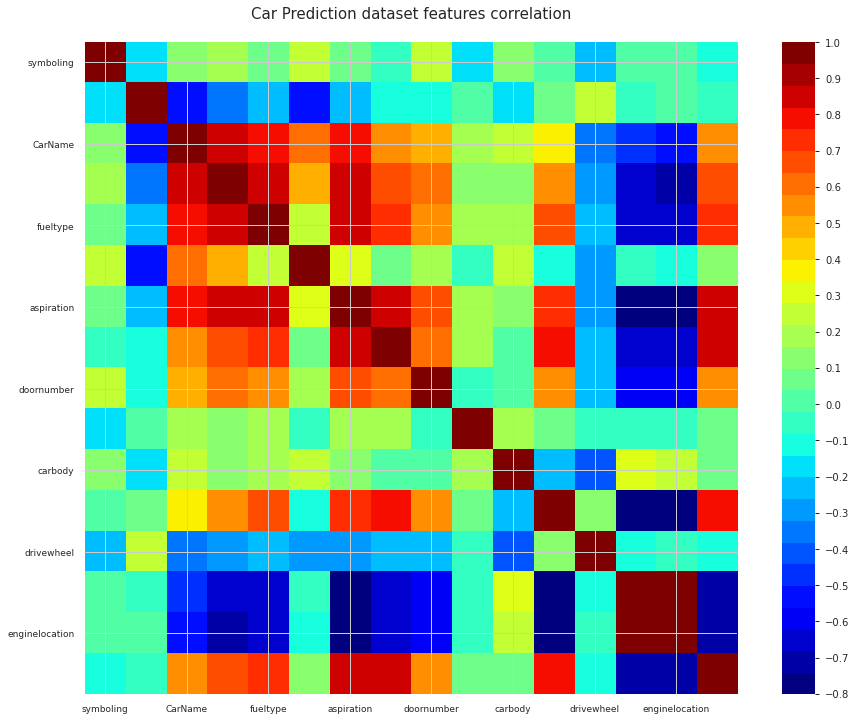

In [15]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Car Prediction dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [16]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

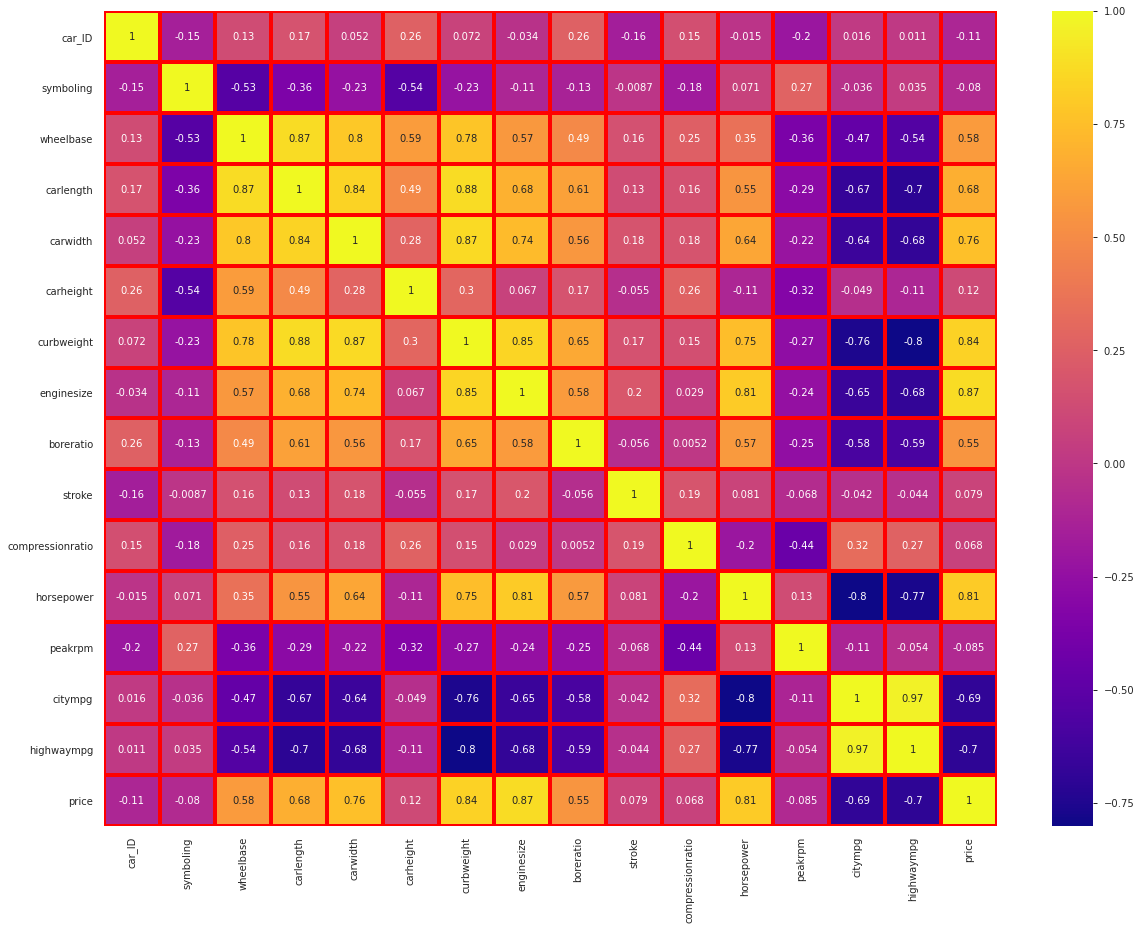

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

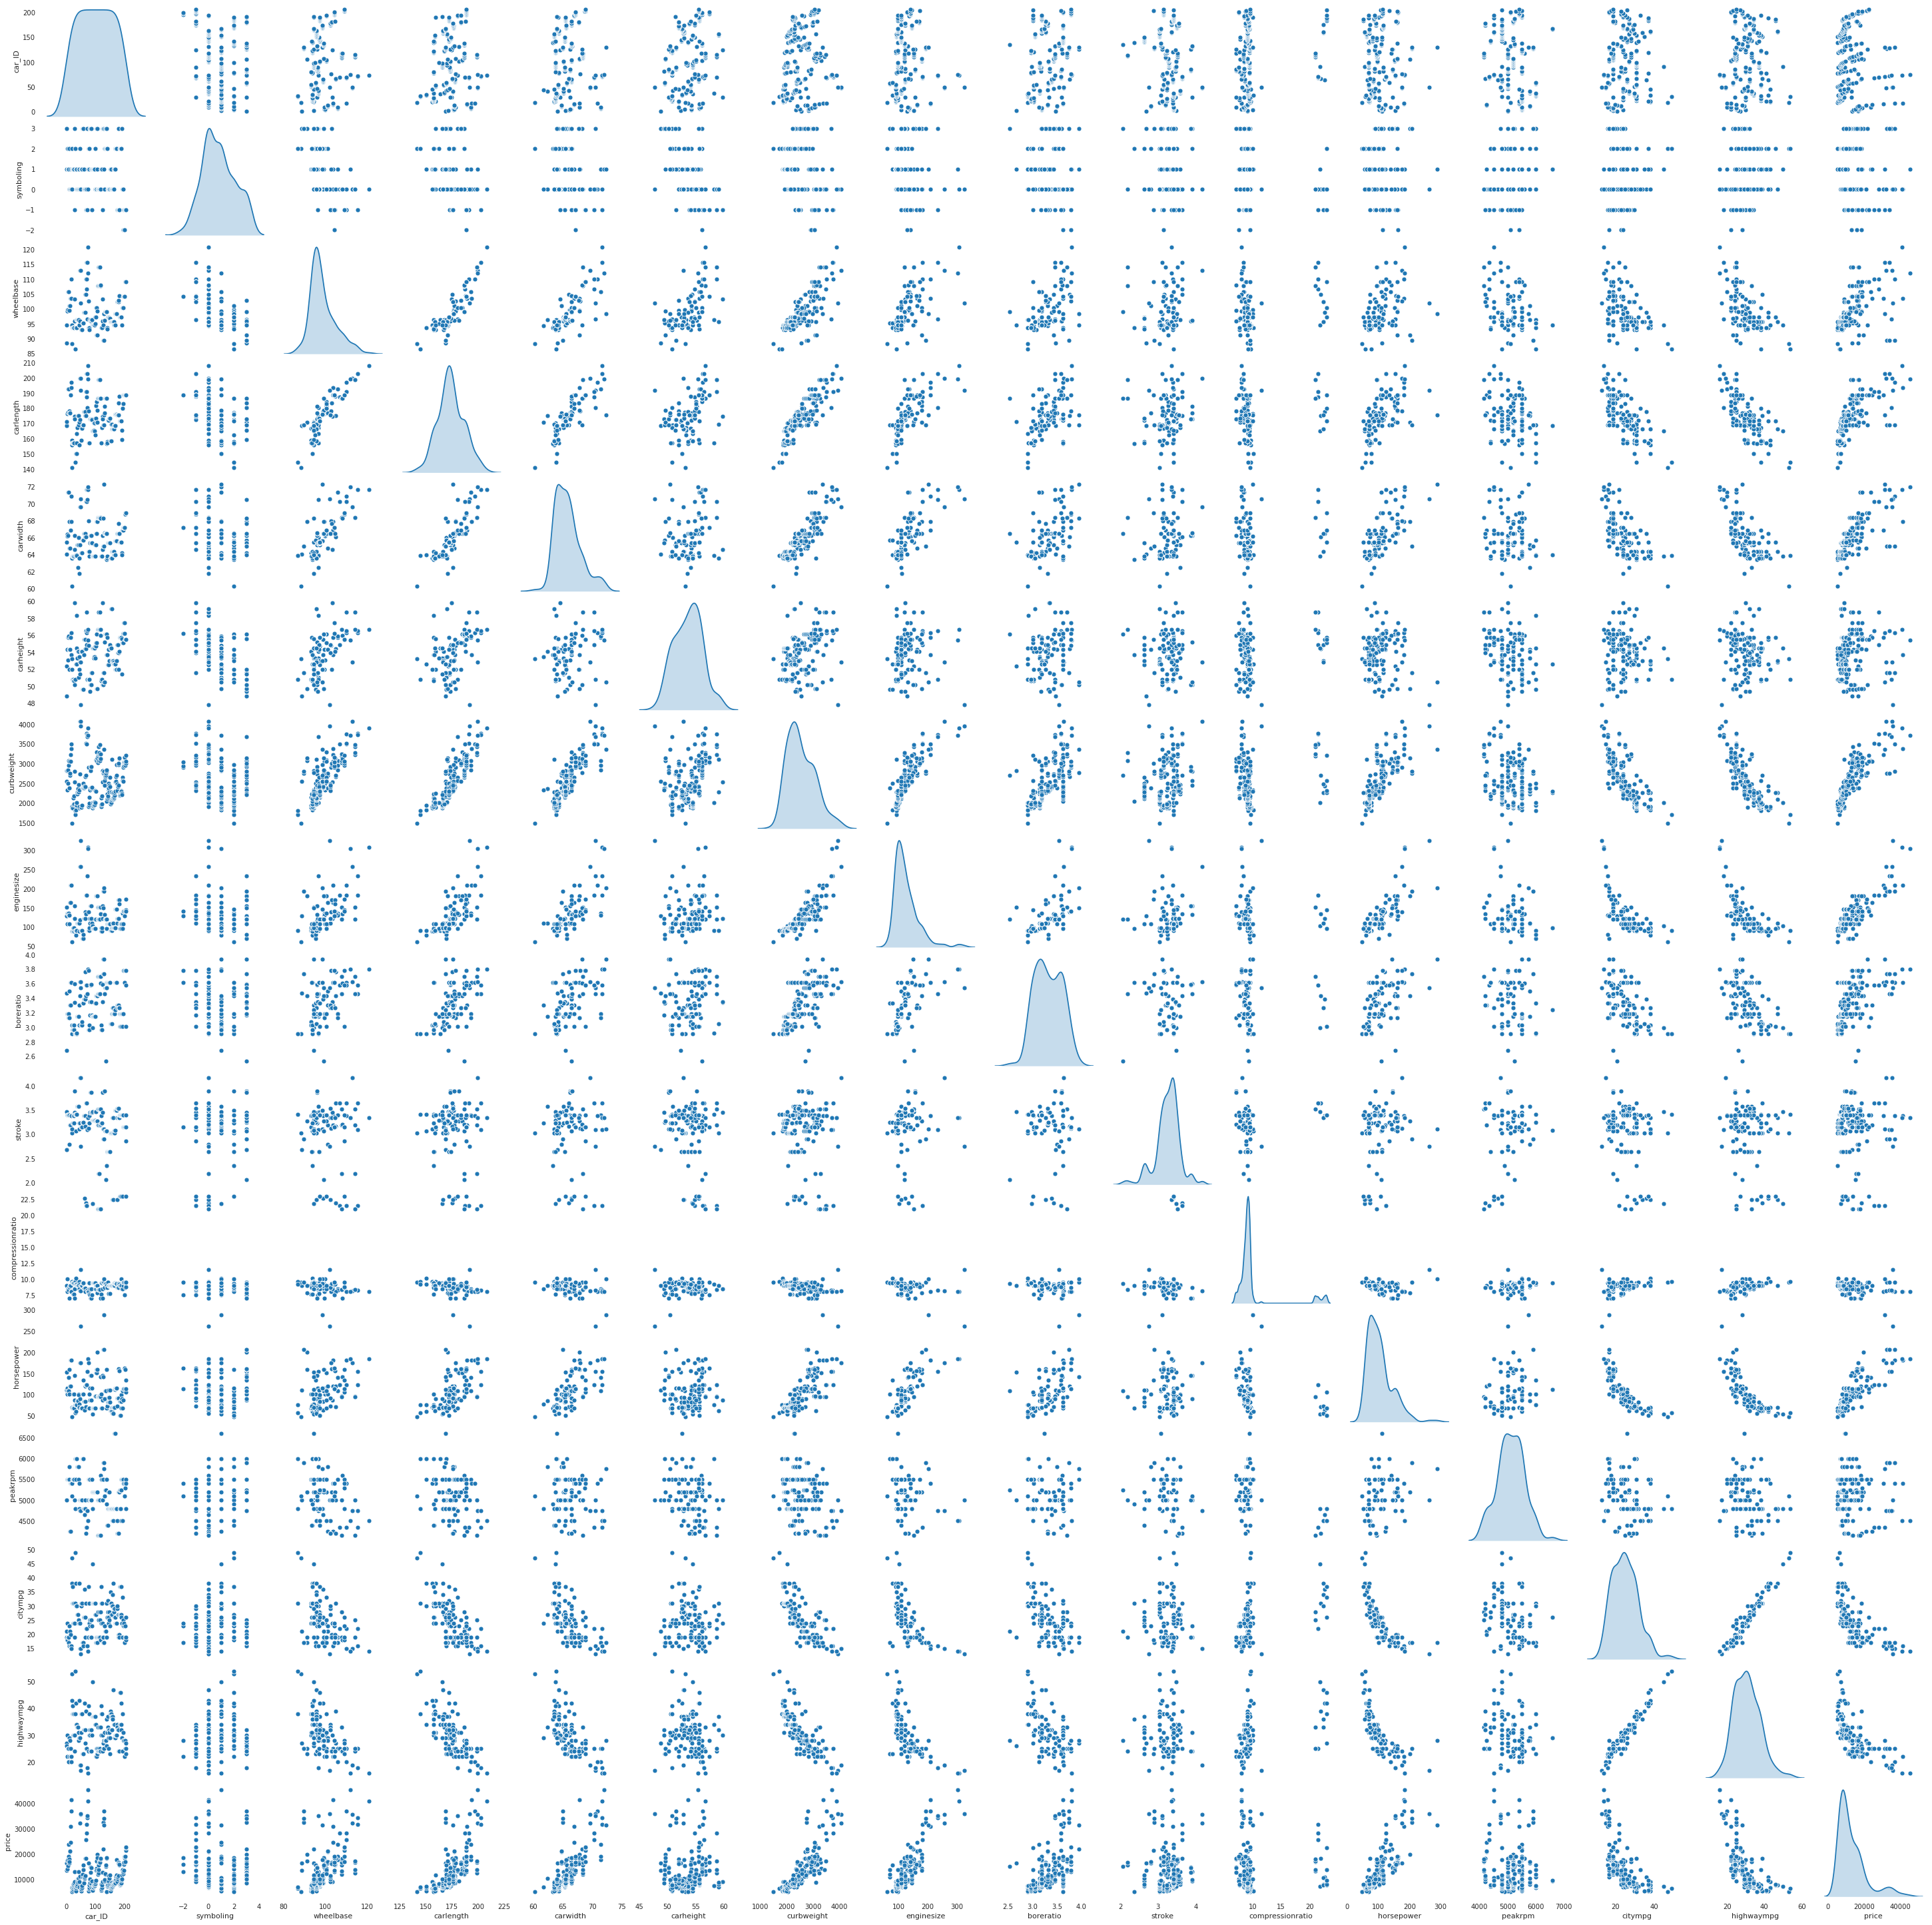

In [18]:
sns.pairplot(df,diag_kind="kde")
plt.show()

In [19]:
drop_cols = ['car_ID'] 
df = df.drop(drop_cols, axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

In [22]:
df=df.copy()

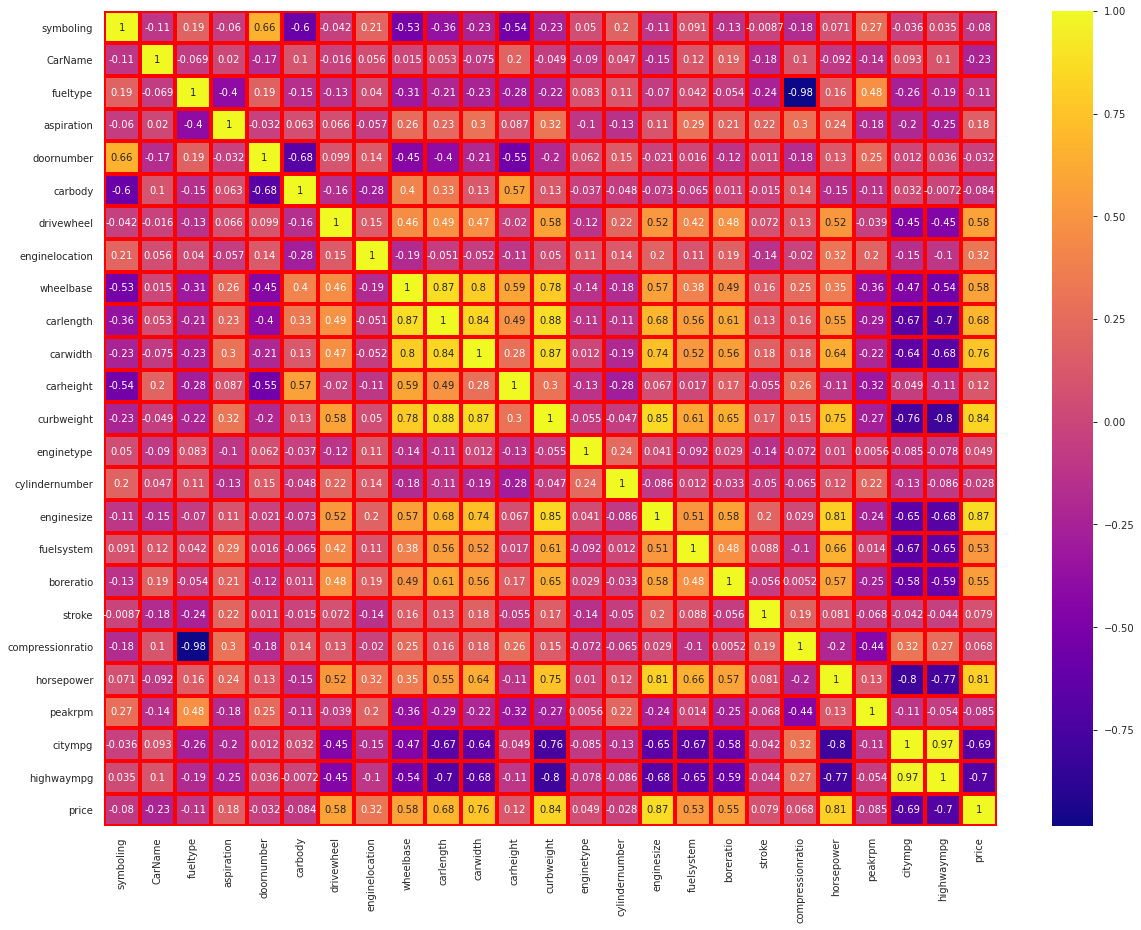

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

In [24]:
new_train = df[df['price'].notnull()]

In [25]:
new_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [26]:
new_test = df[df['price'].isnull()].drop(['price'], axis=1)

In [27]:
new_test

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg


In [28]:
X = new_train.drop('price', axis=1)
y = new_train['price']

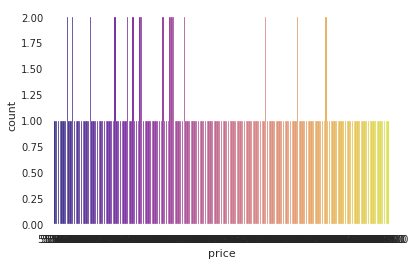

In [29]:
#checking the target variable countplot
sns.countplot(data=new_train,x = 'price',palette='plasma')

In [30]:
from sklearn.model_selection import  train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(164, 24)

In [32]:
X_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,0,60,0,0,0,3,2,0,104.9,175.0,...,2,134,3,3.43,3.64,22.0,72,4200,31,39
111,0,85,1,0,0,3,2,0,107.9,186.7,...,2,120,5,3.46,2.19,8.4,95,5000,19,24
153,0,121,1,0,0,4,1,0,95.7,169.7,...,2,92,1,3.05,3.03,9.0,62,4800,31,37
96,1,76,1,0,0,3,1,0,94.5,165.3,...,2,97,1,3.15,3.29,9.4,69,5200,31,37
38,0,41,1,0,1,2,1,0,96.5,167.5,...,2,110,0,3.15,3.58,9.0,86,5800,27,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,70,1,0,1,2,2,0,99.2,178.5,...,3,181,5,3.43,3.27,9.0,160,5200,19,25
14,1,15,1,0,0,3,2,0,103.5,189.0,...,3,164,5,3.31,3.19,9.0,121,4250,20,25
92,1,76,1,0,0,3,1,0,94.5,165.3,...,2,97,1,3.15,3.29,9.4,69,5200,31,37
179,3,120,1,0,1,2,2,0,102.9,183.5,...,3,171,5,3.27,3.35,9.3,161,5200,19,24


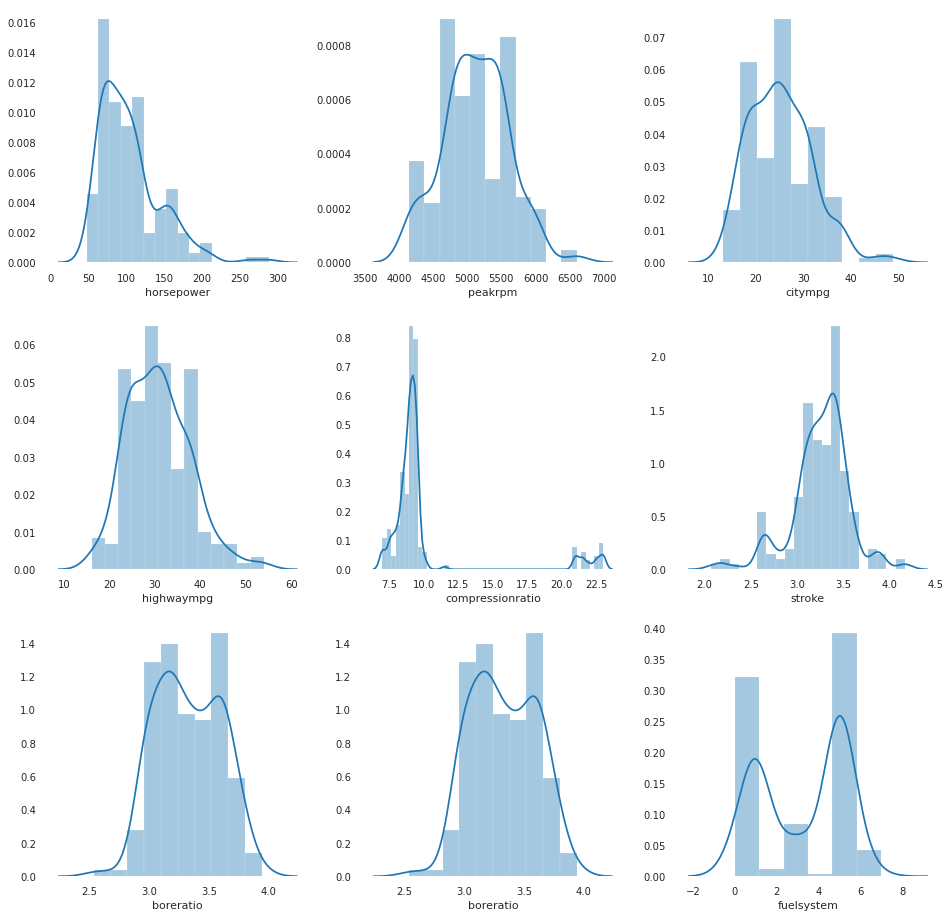

In [33]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['horsepower'],ax=ax2[0][0])
sns.distplot(df['peakrpm'],ax=ax2[0][1])
sns.distplot(df['citympg'],ax=ax2[0][2])
sns.distplot(df['highwaympg'],ax=ax2[1][0])
sns.distplot(df['compressionratio'],ax=ax2[1][1])
sns.distplot(df['stroke'],ax=ax2[1][2])
sns.distplot(df['boreratio'],ax=ax2[2][0])
sns.distplot(df['boreratio'],ax=ax2[2][1])
sns.distplot(df['fuelsystem'],ax=ax2[2][2])

In [34]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [35]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [36]:
# Feature Scaling
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

target = "price"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type,plot=False):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    
    #print(algorithm.get_params(deep=True))
    
    prediction = algorithm.predict(dtestx)
    
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    
    print ('Performance on training data :', algorithm.score(dtrainx,dtrainy)*100)
    print ('Performance on testing data :', algorithm.score(dtestx,dtesty)*100)

    print ("***************************************************************************")
    if plot==True:
        sns.jointplot(x=dtesty, y=prediction, stat_func=pearsonr,kind="reg", color="b") 
    
       
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=5)#,scoring="neg_mean_squared_error"
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean()*100)
    print ("cv-std  :",cross_val.std()*100)
    
    if plot==True:
        plt.figure(figsize=(20,22))
        plt.subplot(211)

        testy = dtesty.reset_index()["price"]

        ax = testy.plot(label="originals",figsize=(20,9),linewidth=2)
        ax = prediction[0].plot(label = "predictions",figsize=(20,9),linewidth=2)
        plt.legend(loc="best")
        plt.title("ORIGINALS VS PREDICTIONS")
        plt.xlabel("index")
        plt.ylabel("values")
        ax.set_facecolor("k")

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 2379.2059120458443
***************************************************************************
Performance on training data : 99.99996348507206
Performance on testing data : 92.82957631390101
***************************************************************************
CROSS VAL

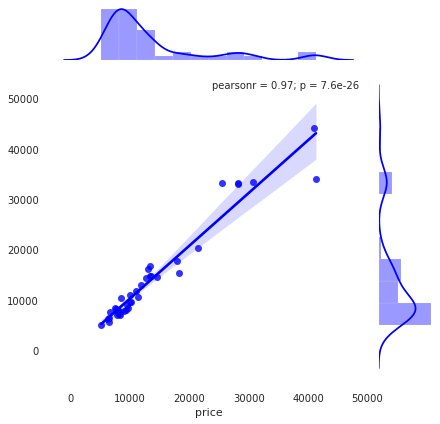

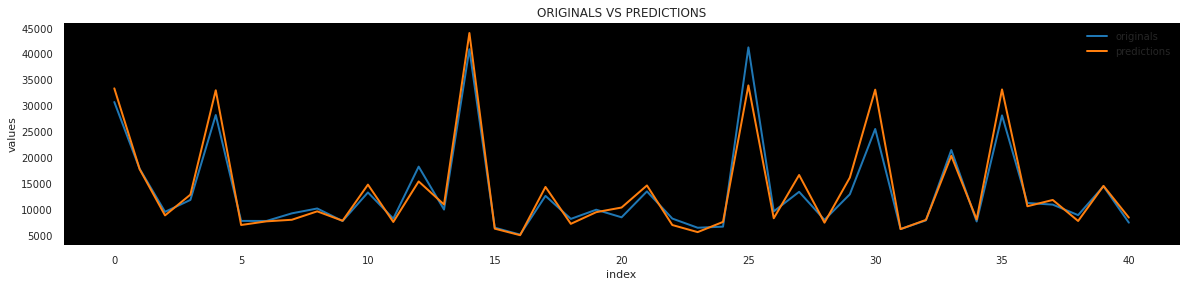

In [38]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor(random_state=42)
model(xgr,X_train,y_train,X_test,y_test,"feat",True)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=0.9,
             colsample_bynode=0.9, colsample_bytree=0.9, gamma=0.1, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.03, max_delta_step=None, max_depth=9,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             random_state=42, reg_alpha=0.005, reg_lambda=None,
             scale_pos_weight=None, subsample=0.7, tree_method=None,
             validate_parameters=None, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 2065.0161856878785
***************************************************************************
Performance on training data : 99.99998515905747
Performance on testing data : 94.59833461782571
***************************************************************************
CROSS VALIDATION 

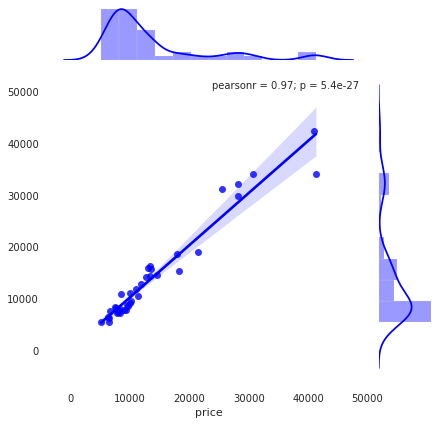

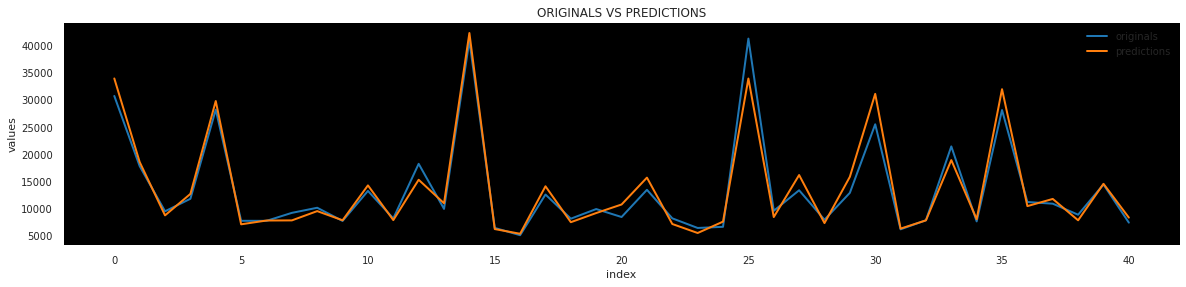

In [39]:
xgr_1=XGBRegressor(random_state=42,learning_rate = 0.03,
                max_depth = 9, n_estimators = 1000,n_jobs=-1,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)
model(xgr_1,X_train,y_train,X_test,y_test,"feat",True)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid={'n_estimators' : [1000,2000,3000,2500],
            'max_depth' : [1,2, 3,5,7,9,10,11,15],
            'learning_rate' :[ 0.0001, 0.001, 0.01, 0.1, 0.15, 0.2, 0.8, 1.0],
                                                     }
# Create a base model
xgbr = XGBRegressor(random_state = 42,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [41]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=0.9, colsample_bynode=0.9,
                                    colsample_bytree=0.9, gamma=0.1,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=0.005, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.7,
                                    tree_method=None, validate_parameters=None,
                             

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 3000}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=0.9, colsample_bytree=0.9, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 2386.084777445053
***************************************************************************
Performance on training data : 99.34545465148518
Performance on testing data : 92.78805348180322
**************************************************************

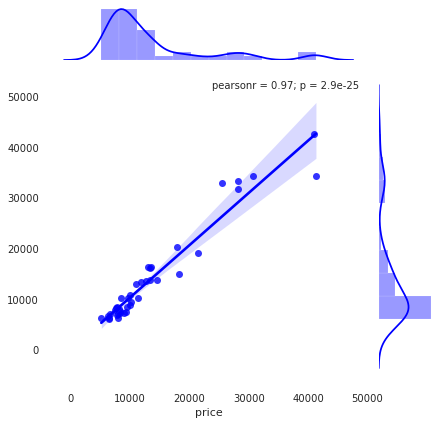

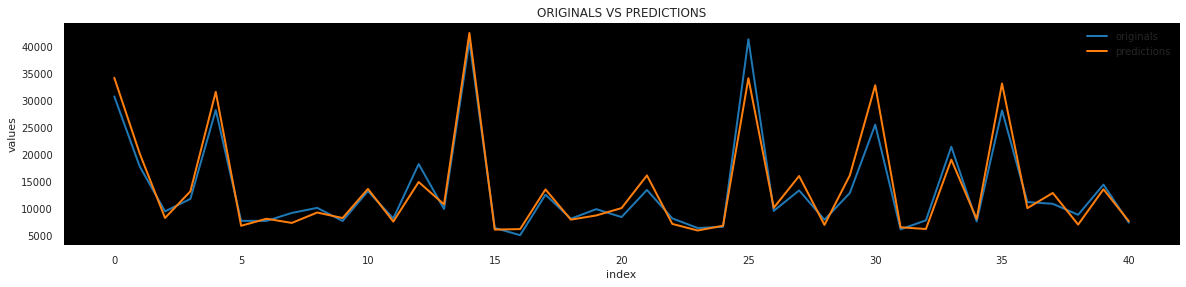

In [42]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
model(best_grid,X_train,y_train,X_test,y_test,"feat",True)

In [43]:
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model(rf,X_train,y_train,X_test,y_test,"feat")

RandomForestRegressor(max_depth=80, n_estimators=2000, n_jobs=-1)
***************************************************************************
ROOT MEAN SQUARED ERROR : 1839.181152327485
***************************************************************************
Performance on training data : 98.71884755170099
Performance on testing data : 95.71520772138896
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 89.68412697191141
cv-std  : 5.79262102456307


In [44]:
from catboost import CatBoostRegressor

In [45]:
cb_model = CatBoostRegressor(iterations=2000,
                             learning_rate=0.03,
                             depth=9,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

***************************************************************************
0:	learn: 7581.3218253	total: 55.8ms	remaining: 1m 51s
50:	learn: 3631.3584479	total: 199ms	remaining: 7.61s
100:	learn: 2126.5611426	total: 329ms	remaining: 6.18s
150:	learn: 1486.5904406	total: 460ms	remaining: 5.63s
200:	learn: 1148.3426152	total: 595ms	remaining: 5.33s
250:	learn: 928.1769094	total: 737ms	remaining: 5.13s
300:	learn: 781.5660387	total: 880ms	remaining: 4.97s
350:	learn: 688.3975999	total: 1.02s	remaining: 4.81s
400:	learn: 603.9534391	total: 1.17s	remaining: 4.66s
450:	learn: 532.5150888	total: 1.31s	remaining: 4.51s
500:	learn: 479.2201877	total: 1.46s	remaining: 4.37s
550:	learn: 433.9875505	total: 1.6s	remaining: 4.22s
600:	learn: 388.8193394	total: 1.75s	remaining: 4.07s
650:	learn: 348.1237562	total: 1.89s	remaining: 3.91s
700:	learn: 314.2124616	total: 2.04s	remaining: 3.77s
750:	learn: 285.0382438	total: 2.18s	remaining: 3.63s
800:	learn: 258.6430883	total: 2.33s	remaining: 3.48s
850

1100:	learn: 78.2045432	total: 2.86s	remaining: 2.33s
1150:	learn: 69.0751214	total: 2.99s	remaining: 2.21s
1200:	learn: 61.5999544	total: 3.13s	remaining: 2.08s
1250:	learn: 54.1158467	total: 3.26s	remaining: 1.95s
1300:	learn: 47.7780651	total: 3.39s	remaining: 1.82s
1350:	learn: 42.5355006	total: 3.51s	remaining: 1.69s
1400:	learn: 37.6153370	total: 3.64s	remaining: 1.56s
1450:	learn: 32.9697067	total: 3.77s	remaining: 1.43s
1500:	learn: 29.5249422	total: 3.91s	remaining: 1.3s
1550:	learn: 26.4245006	total: 4.04s	remaining: 1.17s
1600:	learn: 23.6363942	total: 4.17s	remaining: 1.04s
1650:	learn: 21.2416765	total: 4.3s	remaining: 910ms
1700:	learn: 19.1480426	total: 4.43s	remaining: 779ms
1750:	learn: 17.2122469	total: 4.56s	remaining: 649ms
1800:	learn: 15.5249429	total: 4.69s	remaining: 518ms
1850:	learn: 13.9455290	total: 4.82s	remaining: 388ms
1900:	learn: 12.7372544	total: 4.96s	remaining: 258ms
1950:	learn: 11.5328302	total: 5.09s	remaining: 128ms
1999:	learn: 10.4579989	total:

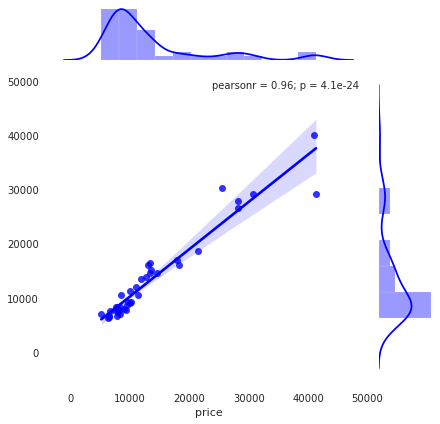

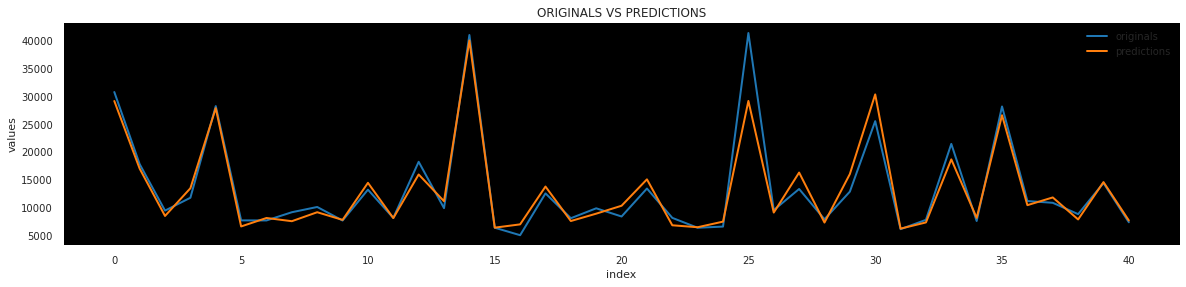

In [46]:
model(cb_model,X_train,y_train,X_test,y_test,"feat",True)

In [47]:
#Multiple Machine Learning Algorithm for Resgression 

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [49]:
model_dict = {
    'LinearRegession': LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'KernelRidge':KernelRidge(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'ElasticNet': ElasticNet(),
    'LinearSVR':LinearSVR(),
    #Perfect Models this Problem
    'XGBRegressor':XGBRegressor(random_state=42, n_estimators=2000, max_depth=9),
    'RandomForestRegressor': RandomForestRegressor(random_state=0, n_estimators=2000, max_depth=9),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42, n_estimators=2000, max_depth=9, learning_rate=0.01)
}

In [50]:
data_list = list()
for name, model in model_dict.items():
    data_dict = dict()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    data_dict['model'] = name
    data_dict['train_score'] = train_score
    data_dict['test_score'] = test_score
    data_list.append(data_dict)
score_df = pd.DataFrame(data_list)
score_df['score_diff'] = score_df['train_score'] - score_df['test_score']
model_df = score_df.sort_values(['test_score'], ascending=[False])
model_df[model_df['test_score'] > 0.5]

,model,train_score,test_score,score_diff
9,RandomForestRegressor,0.986608,0.957210,0.029399
8,XGBRegressor,1.000000,0.928308,0.071692
10,GradientBoostingRegressor,1.000000,0.883361,0.116639
4,SGDRegressor,0.880108,0.860367,0.019741
1,Ridge,0.905131,0.850795,0.054336
5,BayesianRidge,0.900117,0.850230,0.049887
2,Lasso,0.909467,0.842531,0.066936
0,LinearRegession,0.909506,0.840707,0.068798
6,ElasticNet,0.838937,0.800799,0.038138
3,KernelRidge,0.564408,0.648773,-0.084365


In [55]:
""""X = new_train.drop('price', axis=1)
y = new_train['price']
for ind, m_name in enumerate(model_df['model'].tolist()):
    model = model_dict[m_name].fit(X, y)
    predictions = model.predict(new_test)
    test['price'] = predictions
    test[['ID','price']].to_csv('Submission{}_{}.csv'.format(ind+1, m_name), index=False)"""

'"X = new_train.drop(\'price\', axis=1)\ny = new_train[\'price\']\nfor ind, m_name in enumerate(model_df[\'model\'].tolist()):\n    model = model_dict[m_name].fit(X, y)\n    predictions = model.predict(new_test)\n    test[\'price\'] = predictions\n    test[[\'ID\',\'price\']].to_csv(\'Submission{}_{}.csv\'.format(ind+1, m_name), index=False)'

In [ ]:
#Artificial Neural Networks(ANNs) Part:

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [61]:
# Building ANN As a Regressor
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend

#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Initialising the Artificial Neural Networks(ANNs)
model_nn = Sequential()

# Adding the input layer and the first hidden layer
model_nn.add(Dense(512, activation = 'relu', input_dim = 24))
model_nn.add(BatchNormalization())
# Adding the second hidden layer
model_nn.add(Dense(units = 256, activation = 'relu'))
model_nn.add(BatchNormalization())
# Adding the third hidden layer
model_nn.add(Dense(units = 256, activation = 'relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(BatchNormalization())
# Adding the output layer
model_nn.add(Dense(units = 1))

# Optimize , Compile And Train The Model 
opt =keras.optimizers.Adam(lr=0.003)
#print(model_nn.summary())
model_nn.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])

In [62]:
import tensorflow as tf
checkpoint_filepath ='best.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_rmse',
    mode='min',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history=model_nn.fit(sc.fit_transform(X_train),y_train,epochs = 300 ,batch_size=32,validation_data=(sc.transform(X_test), y_test), callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
model_nn.load_weights(checkpoint_filepath)

Epoch 1/300


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 25 but received input with shape [None, 24]


In [ ]:
# Predicting and Finding R Squared Score
y_predict = model_nn.predict(sc.transform(X_test))
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, y_predict))) 

plt.figure(figsize=(20,5))
plt.plot(list(y_test) ,color = 'red', label = 'Real data',marker='o')
plt.plot(y_predict, color = 'blue', label = 'Predicted data',marker='o')
plt.title('Prediction')
plt.legend()
plt.show()

# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()